# September_2022_L3_C1_S4_Practice

In [1]:
import numpy as np # for numerical calculation
import pandas as pd #for data analysis
import matplotlib.pyplot as plt # for data visualization
import seaborn as sb # for data visualization

import warnings # to ignore warning
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error # to know error value

from statsmodels.tsa.ar_model import AutoReg # to find best mofe for arima

from statsmodels.tsa.seasonal import seasonal_decompose # to view trend , seasonal and residual of data
from statsmodels.tsa.arima.model import ARIMA # to build arima model
from statsmodels.tsa.api import adfuller,acf,pacf # to view the stationarity of the data

import statsmodels.api as sm # to build SARIMA model

#from pmdarima.arima import auto_arima

In [3]:
train = pd.read_csv('DS3_C1_S4_DailyDelhiClimateTrain_Data_Practice.csv',parse_dates=['date'],index_col=['date'])
test = pd.read_csv('DS3_C1_S4_DailyDelhiClimateTest_Data_Practice.csv',parse_dates=['date'],index_col=['date'])

FileNotFoundError: [Errno 2] No such file or directory: 'DS3_C1_S4_DailyDelhiClimateTrain_Data_Practice.csv'

In [3]:
df=pd.concat([train,test]) # joining both dataset

In [4]:
df.tail(3)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-04-22,32.900,40.900000,8.890000,1001.600000
2017-04-23,32.875,27.500000,9.962500,1002.125000
2017-04-24,32.000,27.142857,12.157143,1004.142857


In [5]:
x=df[['meantemp']] # extracting mean temperature from dataset
x

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000
...,...
2017-04-20,34.500000
2017-04-21,34.250000
2017-04-22,32.900000


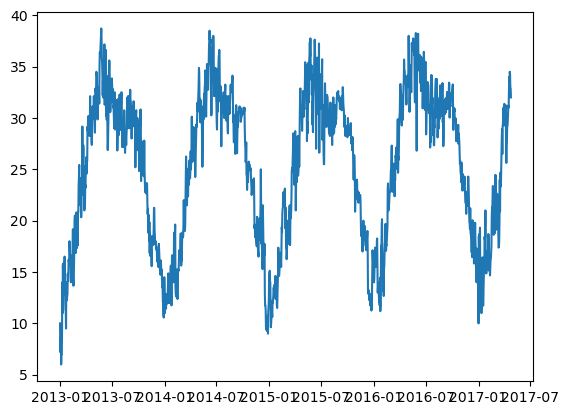

In [6]:
plt.plot(x) # ploting

In [7]:
data = x.resample('W').mean() # Resampling the data

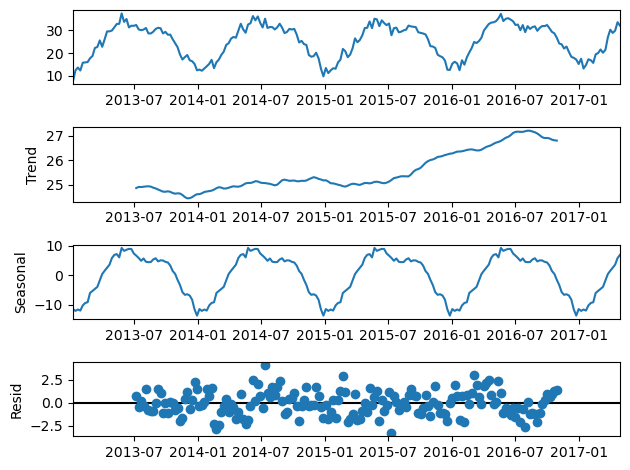

In [8]:
seasonal_decompose(data).plot(); # decomposition of data

In [9]:
# spliting the data
ss = int(0.7 * len(data))
train = data.iloc[:ss]
test = data.iloc[ss:]
print('Train = {}, Test = {}'.format(len(train), len(test)))

Train = 158, Test = 68


# 5 Check Stationarity

In [10]:
def check_stationarity(data): # to check the stationarity of the data
    
    pvalue = adfuller(data['meantemp'])[1]
    print('Pvalue={}'.format(pvalue))
    if pvalue < 0.05:
        msg=('Data is Stationarity Best for model building')
    else:
        msg=print('Data is not Stationarity Make the data Stationarity before model building')
    return msg

In [11]:
check_stationarity(data) 

Pvalue=5.224837272985191e-06


'Data is Stationarity Best for model building'

# 6 Plot ACF and PACF

In [12]:
data

,meantemp
date,
2013-01-06,7.705556
2013-01-13,12.343537
2013-01-20,13.642857
2013-01-27,12.329592
2013-02-03,15.736905
...,...
2017-04-02,30.203515
2017-04-09,28.805189
2017-04-16,29.820862


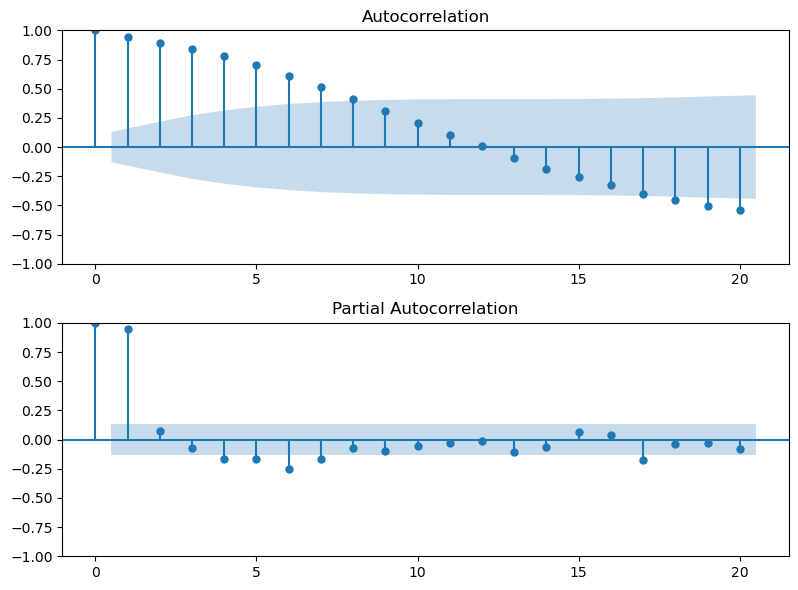

In [13]:
fig = plt.figure(figsize=(8,6))

ax1= fig.add_subplot(211)

sm.graphics.tsa.plot_acf(data,lags=20,ax=ax1)

ax2= fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(data,lags=20,ax=ax2)
plt.tight_layout()

# use auto ARIMA for selection of p,d,q

In [14]:
m = auto_arima(data['meantemp'],start_p=0,max_p=2,start_q=0,max_q=8, seasonal=False,trace=True)
m.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2120.297, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1838.535, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=986.469, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=987.730, Time=0.29 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=985.438, Time=0.29 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1624.799, Time=0.20 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=990.106, Time=0.57 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=984.261, Time=0.29 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=1487.781, Time=0.73 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=958.010, Time=0.33 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=956.581, Time=0.33 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=976.482, Time=0.28 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=957.787, Time=0.43 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=965.7

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  226
Model:               SARIMAX(2, 0, 3)   Log Likelihood                -462.010
Date:                Thu, 14 Sep 2023   AIC                            938.020
Time:                        20:50:46   BIC                            961.964
Sample:                    01-06-2013   HQIC                           947.683
                         - 04-30-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4834      0.092      5.239      0.000       0.303       0.664
ar.L1          1.9084      0.035     54.124      0.000       1.839       1.978
ar.L2         -0.9277      0.035    -26.713      0.000      -0.996      -0.860
ma.L1         -1.2001      0.082    -14.648      0.000      -1.361      -1.040
ma.L2          0.2517      0.103      2.452      0.014       0.050       0.453
ma.L3          0.1605      0.073      2.199      0.028       0.017       0.304
sigma2         3.4191      0.371      9.228      0.000       2.693       4.145
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 3.39
Prob(Q):                              0.69   Prob(JB):                         0.18
Heteroskedasticity (H):               0.87   Skew:                            -0.26
Prob(H) (two-sided):                  0.53   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
print('Train = {}, Test = {}'.format(len(train),len(test)))

Train = 158, Test = 68


In [16]:
p,d,q=(2,0,3)

In [17]:
m1 = ARIMA(data['meantemp'],order = (p,d,q)).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                  226
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -460.582
Date:                Thu, 14 Sep 2023   AIC                            935.163
Time:                        20:50:47   BIC                            959.107
Sample:                    01-06-2013   HQIC                           944.826
                         - 04-30-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.4642      0.441     57.794      0.000      24.601      26.328
ar.L1          1.9720      0.007    292.933      0.000       1.959       1.985
ar.L2         -0.9877      0.007   -149.075      0.000      -1.001      -0.975
ma.L1         -1.2765      0.069    -18.516      0.000      -1.412      -1.141
ma.L2          0.2779      0.104      2.664      0.008       0.073       0.482
ma.L3          0.0493      0.067      0.732      0.464      -0.083       0.181
sigma2         3.3759      0.348      9.708      0.000       2.694       4.058
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 3.80
Prob(Q):                              0.71   Prob(JB):                         0.15
Heteroskedasticity (H):               0.98   Skew:                            -0.31
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
start = len(train)
end = len(train) + len(test)-1
print('Start = {}, end = {}'.format(start,end))

prediction = m1.predict(start,end,typ = 'levels')
prediction

Start = 158, end = 225


date
2016-01-17    15.674653
2016-01-24    15.788432
2016-01-31    13.977276
2016-02-07    16.696605
2016-02-14    16.080226
                ...    
2017-04-02    26.509552
2017-04-09    29.919141
2017-04-16    30.037397
2017-04-23    30.904685
2017-04-30    33.588039
Freq: W-SUN, Name: predicted_mean, Length: 68, dtype: float64

In [19]:
actual = []; pred = []

for i in range(len(prediction)):
    actual.append(test['meantemp'][i])
    pred.append(prediction[i])
    
df_res = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res['err'] = df_res.actual - df_res.predicted
df_res

,actual,predicted,err
0,15.454167,15.674653,-0.220486
1,12.462330,15.788432,-3.326102
2,16.821429,13.977276,2.844153
3,14.889494,16.696605,-1.807111
4,18.084357,16.080226,2.004131
...,...,...,...
63,30.203515,26.509552,3.693962
64,28.805189,29.919141,-1.113952
65,29.820862,30.037397,-0.216535
66,33.511508,30.904685,2.606823


<AxesSubplot:>

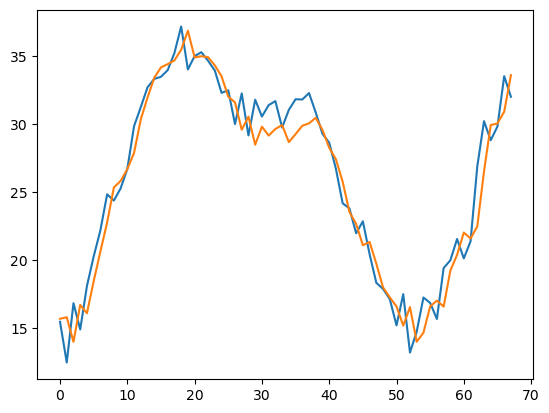

In [20]:
df_res.actual.plot()
df_res.predicted.plot()

<AxesSubplot:>

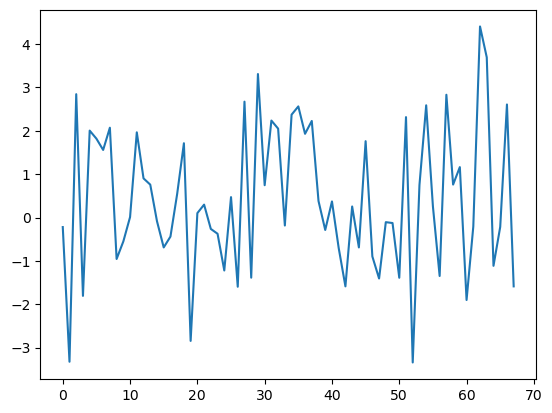

In [21]:
df_res.err.plot()

# LJung-Box test

In [22]:
pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1],return_df=True)['lb_pvalue'].values

if pvalue < 0.05:
    print('Reject H0. Bad model')
else:
    print('Fail to Reject H0. Good model')

Fail to Reject H0. Good model


# Calculate error terms

In [23]:
msg = "ARIMA model. Order = (" +str(p) + "," + str(d) + "," + str(q) + ")"

mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tRMSE= {}\n\tRMSE = {}".format(mse1, np.sqrt(mse1)))

ARIMA model. Order = (2,0,3)
	RMSE= 3.013757021056567
	RMSE = 1.7360175751001392


# Forecast the data for further Prediction

In [24]:
fcast = m1.predict(start=len(data),end = len(data)+11,typ = 'levels')
fcast

2017-05-07    33.145569
2017-05-14    33.843855
2017-05-21    34.323983
2017-05-28    34.659389
2017-06-04    34.846597
2017-06-11    34.884496
2017-06-18    34.774328
2017-06-25    34.519640
2017-07-02    34.126201
2017-07-09    33.601880
2017-07-16    32.956502
2017-07-23    32.201668
Freq: W-SUN, Name: predicted_mean, dtype: float64

Text(0.5, 1.0, 'ARIMA model. Order = (2,0,3)')

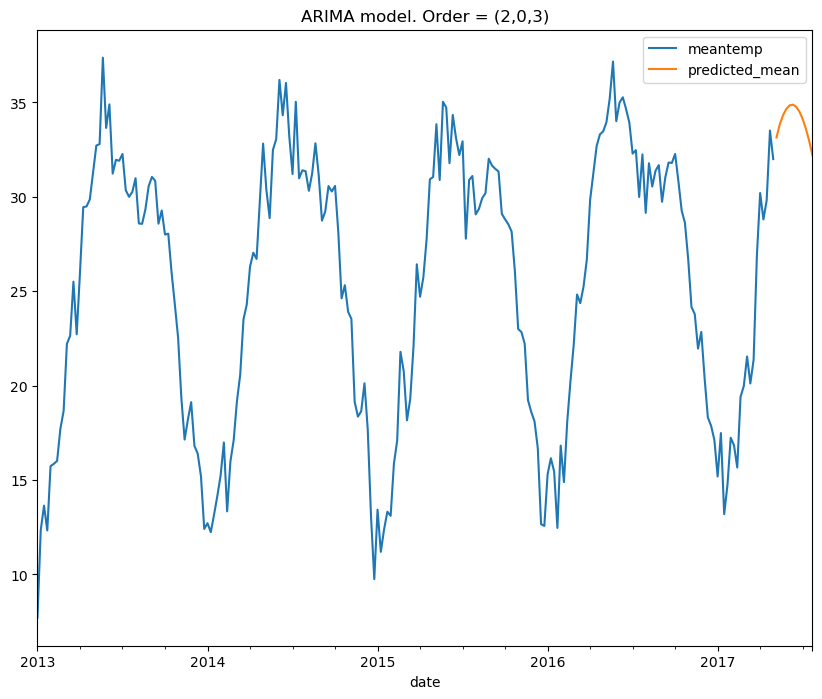

In [25]:
data['meantemp'].plot(figsize=(10,8),legend=True)
fcast.plot(legend=True)
plt.title(msg)

# SARIMA

In [26]:
data

,meantemp
date,
2013-01-06,7.705556
2013-01-13,12.343537
2013-01-20,13.642857
2013-01-27,12.329592
2013-02-03,15.736905
...,...
2017-04-02,30.203515
2017-04-09,28.805189
2017-04-16,29.820862


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

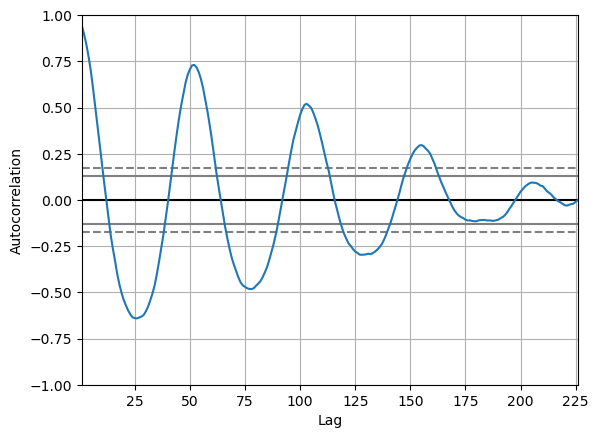

In [27]:
from pandas.plotting import autocorrelation_plot # just for our understanding

autocorrelation_plot(data['meantemp'])

In [28]:
data.describe()

,meantemp
count,226.000000
mean,25.242894
std,7.207142
min,7.705556
25%,18.616071
50%,27.767857
75%,31.226599
max,37.370408


<AxesSubplot:xlabel='date'>

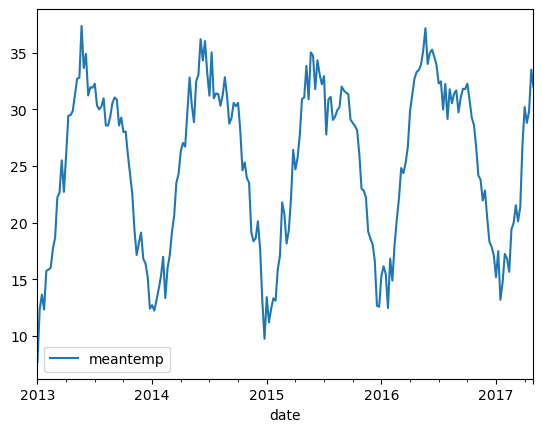

In [29]:
data.plot()

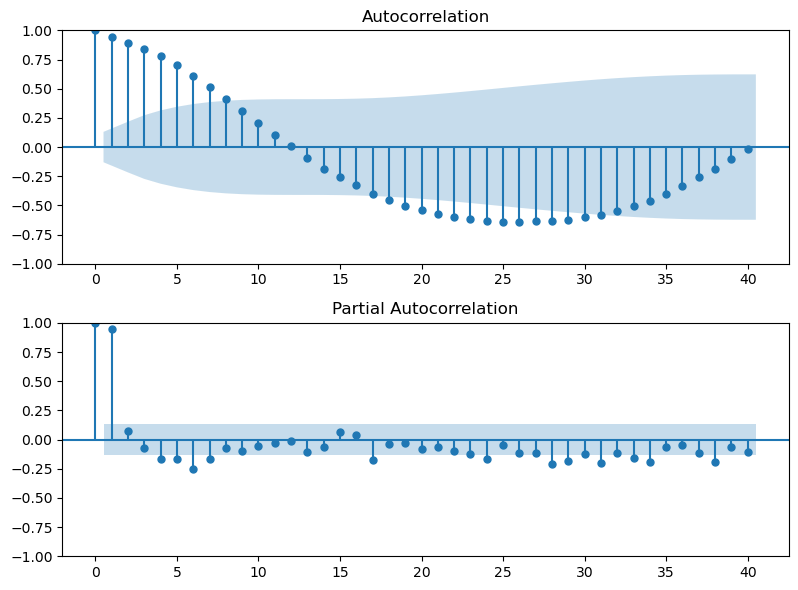

In [30]:
fig = plt.figure(figsize=(8,6))

ax1= fig.add_subplot(211)

sm.graphics.tsa.plot_acf(data,lags=40,ax=ax1)

ax2= fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(data,lags=40,ax=ax2)
plt.tight_layout()

2) Build the SARIMA Model

In [31]:
p,d,q = (1,2,1)
sam1= sm.tsa.statespace.SARIMAX(data,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
sam1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           meantemp   No. Observations:                  226
Model:             SARIMAX(1, 2, 1)x(1, 2, 1, 12)   Log Likelihood                -502.516
Date:                            Thu, 14 Sep 2023   AIC                           1015.031
Time:                                    20:50:52   BIC                           1031.523
Sample:                                01-06-2013   HQIC                          1021.705
                                     - 04-30-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2693      0.086     -3.148      0.002      -0.437      -0.102
ma.L1         -0.7742      0.051    -15.276      0.000      -0.874      -0.675
ar.S.L12      -0.4560      0.071     -6.438      0.000      -0.595      -0.317
ma.S.L12      -0.9990     18.353     -0.054      0.957     -36.971      34.973
sigma2         7.0397    129.090      0.055      0.957    -245.972     260.051
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 0.90
Prob(Q):                              0.70   Prob(JB):                         0.64
Heteroskedasticity (H):               0.71   Skew:                            -0.11
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
p,d,q=(1,2,3)
sam2= sm.tsa.statespace.SARIMAX(data,order = (p,d,q), seasonal_order=(p,d,q,12)).fit()
sam2.summary()

C:\Users\prabh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           meantemp   No. Observations:                  226
Model:             SARIMAX(1, 2, 3)x(1, 2, 3, 12)   Log Likelihood                -477.637
Date:                            Thu, 14 Sep 2023   AIC                            973.274
Time:                                    20:51:07   BIC                           1002.959
Sample:                                01-06-2013   HQIC                           985.287
                                     - 04-30-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3221      0.428      0.753      0.451      -0.516       1.160
ma.L1         -1.4317      0.449     -3.189      0.001      -2.312      -0.552
ma.L2          0.5968      0.553      1.079      0.280      -0.487       1.681
ma.L3          0.0166      0.215      0.077      0.938      -0.405       0.439
ar.S.L12      -0.9717      0.423     -2.295      0.022      -1.801      -0.142
ma.S.L12      -0.9341      4.400     -0.212      0.832      -9.557       7.689
ma.S.L24      -0.9368      6.674     -0.140      0.888     -14.018      12.144
ma.S.L36       0.9914      4.225      0.235      0.815      -7.290       9.273
sigma2         4.4491     17.474      0.255      0.799     -29.799      38.698
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.33
Prob(Q):                              0.89   Prob(JB):                         0.85
Heteroskedasticity (H):               0.96   Skew:                             0.08
Prob(H) (two-sided):                  0.88   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
p,d,q= (1,0,0)
sam3 = sm.tsa.statespace.SARIMAX(data['meantemp'],order=(p,d,q), seasonal_order=(p,d,q,12)).fit()
sam3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           meantemp   No. Observations:                  226
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -490.249
Date:                            Thu, 14 Sep 2023   AIC                            986.498
Time:                                    20:51:08   BIC                            996.760
Sample:                                01-06-2013   HQIC                           990.639
                                     - 04-30-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9966      0.005    218.686      0.000       0.988       1.006
ar.S.L12      -0.0461      0.075     -0.617      0.537      -0.193       0.100
sigma2         4.3875      0.463      9.471      0.000       3.480       5.295
===================================================================================
Ljung-Box (L1) (Q):                   0.64   Jarque-Bera (JB):                 1.55
Prob(Q):                              0.42   Prob(JB):                         0.46
Heteroskedasticity (H):               0.99   Skew:                             0.02
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
p,d,q= (1,3,2)
sam4 = sm.tsa.statespace.SARIMAX(data['meantemp'],order= (p,d,q),seasonal_order=(p,d,q,12)).fit()
sam4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           meantemp   No. Observations:                  226
Model:             SARIMAX(1, 3, 2)x(1, 3, 2, 12)   Log Likelihood                -524.717
Date:                            Thu, 14 Sep 2023   AIC                           1063.434
Time:                                    20:51:26   BIC                           1086.051
Sample:                                01-06-2013   HQIC                          1072.598
                                     - 04-30-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3031      0.090     -3.382      0.001      -0.479      -0.127
ma.L1         -1.7599      0.493     -3.566      0.000      -2.727      -0.793
ma.L2          0.7606      0.367      2.074      0.038       0.042       1.479
ar.S.L12      -0.6943      0.094     -7.409      0.000      -0.878      -0.511
ma.S.L12      -0.9668    138.446     -0.007      0.994    -272.315     270.381
ma.S.L24      -0.0331      4.662     -0.007      0.994      -9.171       9.105
sigma2         5.4803    758.492      0.007      0.994   -1481.137    1492.098
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 0.13
Prob(Q):                              0.67   Prob(JB):                         0.94
Heteroskedasticity (H):               0.80   Skew:                            -0.06
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Interpretion
AIC score of SARIMA of model(1) is 1015.031

AIC score of SARIMA of model(2) is 973.274

AIC score of SARIMA of model(3) is 986.498

AIC score of SARIMA of model(4) is 1063.434

Lesser the AIC score is better the model. Hence SARIMA(2) is the better model

In [56]:
predict2 = sam2.predict(start = start,end = end,dynamic = True)

In [57]:
df_res2 = pd.DataFrame({'actual':data.meantemp[start:],'predicted':predict2})
df_res2['err'] = df_res2.actual - df_res2.predicted
df_res2

,actual,predicted,err
date,,,
2016-01-17,15.454167,14.775449,0.678718
2016-01-24,12.462330,14.580126,-2.117796
2016-01-31,16.821429,16.105791,0.715637
2016-02-07,14.889494,15.142835,-0.253341
2016-02-14,18.084357,13.414988,4.669369
...,...,...,...
2017-04-02,30.203515,58.861349,-28.657834
2017-04-09,28.805189,58.258243,-29.453054
2017-04-16,29.820862,61.497378,-31.676516


In [58]:
mean_squared_error(df_res2.actual,df_res2.predicted)

343.92362330187285

<AxesSubplot:xlabel='date'>

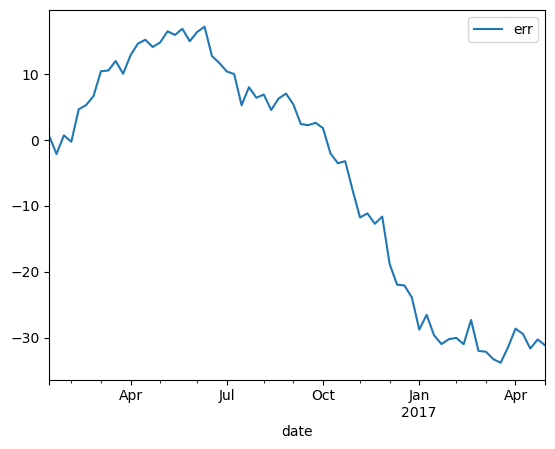

In [59]:
df_res2[['err']].plot()

<AxesSubplot:xlabel='date'>

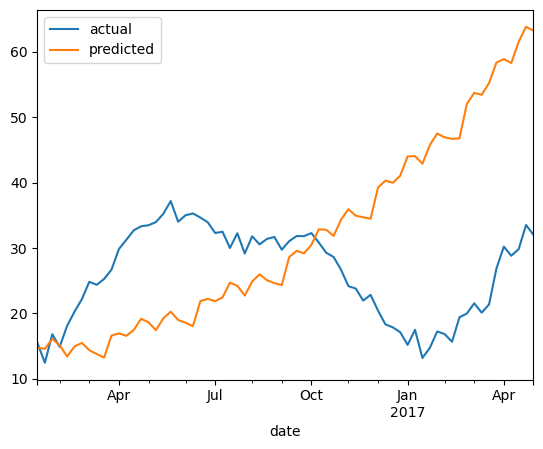

In [60]:
df_res2[['actual','predicted']].plot()

In [54]:
fcast2= sam2.predict(start=len(data),end= len(data) +15, typ= 'levels').rename('forecast')
fcast2

2017-05-07    33.145105
2017-05-14    34.671329
2017-05-21    36.419883
2017-05-28    38.005667
2017-06-04    37.860406
2017-06-11    38.457002
2017-06-18    40.048961
2017-06-25    41.804206
2017-07-02    41.166697
2017-07-09    43.174427
2017-07-16    45.003025
2017-07-23    45.299797
2017-07-30    45.476033
2017-08-06    47.172549
2017-08-13    48.340251
2017-08-20    50.160042
Freq: W-SUN, Name: forecast, dtype: float64

3) Forecast the future data using the model

<AxesSubplot:xlabel='date'>

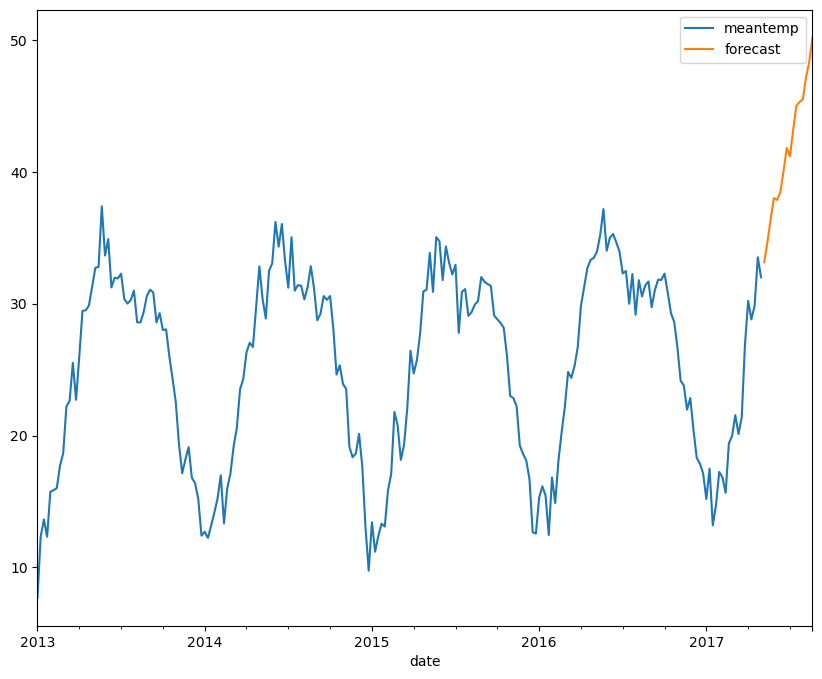

In [55]:
data['meantemp'].plot(figsize=(10,8), legend = True)
fcast2.plot(legend=True)